## Quantum Computer Programming Introduction / Введение в квантовое компьютерное программирование

Welcome to a series on programming quantum computers. There's no shortage of hype around quantum computing on the internet, but I am going to still outline the propositions made by quantum computing in general, as well as how this pertains to us and programmers who intend to work with quantum computers, which we will be doing immediately in this series.

https://pythonprogramming.net/quantum-computer-programming-tutorial/

Добро пожаловать в серию статей о программировании квантовых компьютеров. В Интернете нет недостатка в шумихе вокруг квантовых вычислений, но я все же собираюсь обрисовать предложения, сделанные квантовыми вычислениями в целом, а также то, как это относится к нам и программистам, которые намереваются работать с квантовыми компьютерами, которыми мы будем делаю сразу в этой серии.

https://pythonprogramming.net/quantum-computer-programming-tutorial/

In [56]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  

In [29]:
circuit.draw() 

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

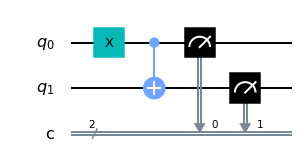

In [31]:
circuit.draw(output="mpl")  # matplotlib-based visualization.

In [32]:
from qiskit import IBMQ

In [33]:
IBMQ.load_account()

/Users/silveryr/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-12 06:18:07,436: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [35]:
provider = IBMQ.get_provider("ibm-q")

In [36]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 12 queued and 5 qubits
ibmq_16_melbourne has 12 queued and 15 qubits
ibmq_vigo has 13 queued and 5 qubits
ibmq_ourense has 4 queued and 5 qubits
ibmq_valencia has 4 queued and 5 qubits
ibmq_armonk has 1 queued and 1 qubits
ibmq_athens has 2 queued and 5 qubits
ibmq_santiago has 40 queued and 5 qubits


In [37]:
from qiskit.tools.monitor import job_monitor

In [38]:
backend = provider.get_backend("ibmq_valencia")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [44]:
from qiskit.visualization import plot_histogram
from matplotlib import style

In [40]:
style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

In [41]:
result = job.result()
counts = result.get_counts(circuit)

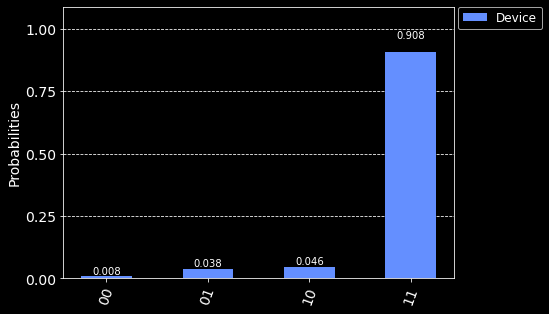

In [42]:
plot_histogram([counts], legend=['Device'])

In [45]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

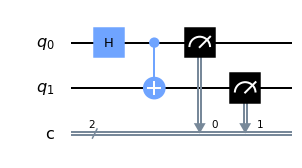

In [46]:
circuit.draw(output="mpl")

In [47]:
backend = provider.get_backend("ibmq_valencia")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [48]:
result = job.result()
counts = result.get_counts(circuit)

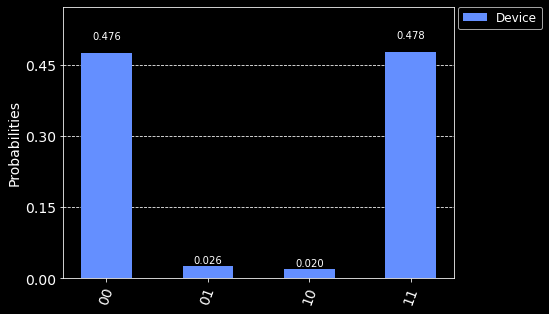

In [49]:
plot_histogram([counts], legend=['Device'])

In [50]:
from qiskit import Aer  # simulator framework from qiskit

In [51]:
# will create a statevector of possibilities. 
sim_backend = Aer.get_backend('qasm_simulator')

In [52]:
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [53]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [54]:
result = job.result()
counts = result.get_counts(circuit)

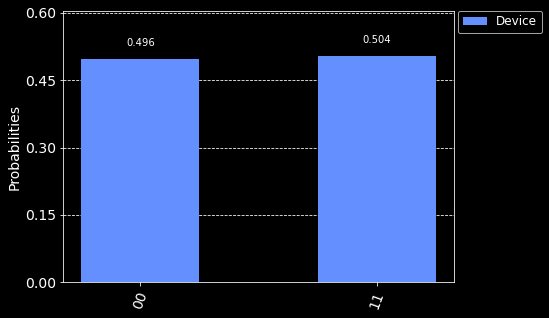

In [55]:
plot_histogram([counts], legend=['Device'])